In [1]:
# CIL EXCERCISE 11 : COMPRESSED SENSING 
# ETH Zurich 
# @ Author: Hadi Daneshmand, Xinrui Lyu
# required libraries 
import numpy as np
from matplotlib import pyplot as plt
from skimage import io 
from sklearn.linear_model import Lasso
from scipy.fftpack import dct,idct
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


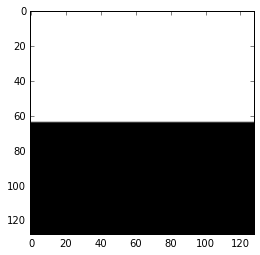

In [2]:
# creating dataset 
img = np.zeros((128,128))
w = 64
for i in range(w): 
    img[i,:]= 1
plt.gray()
plt.imshow(img)

We want to reconstract the above image from a few random measurements that are generated as: 

In [3]:
m = 1000 # measurment number 
rmat = np.random.randn(m,img.shape[0]*img.shape[1]) # random matrix
measurements = np.dot(rmat,img.reshape(img.shape[0]*img.shape[1])) # measurements

As you observe, the above dataset is not sparse. However its 2d cosine transform, which is ploted in the next section, is sparse.

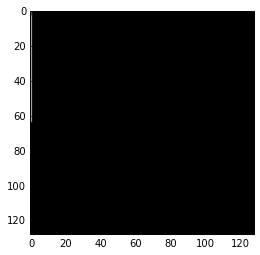

In [4]:
dcti = dct(img)
plt.imshow(dcti)

Use the above fact to recontruct the orginal signal from random measurements (Hint: You can also use sklearn.linear_model.Lasso())

In [5]:
# we do the compressed sensing in cosine bases
theta = np.zeros((m,img.shape[0]*img.shape[1])) 
for i in range(m): 
    theta[i,:] = np.transpose(dct(rmat[i,:].reshape((img.shape[0],img.shape[1]))).reshape(img.shape[0]*img.shape[1]))

In [6]:
t_lasso = Lasso(alpha=10) 
t_lasso.fit(theta,measurements)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

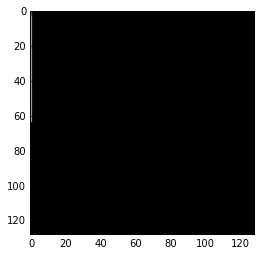

In [7]:
rec_t = t_lasso.coef_.reshape(img.shape[0],img.shape[1]) # recovered cosine transform
rec_t_dct = idct(rec_t) # recovered image
plt.imshow(rec_t)

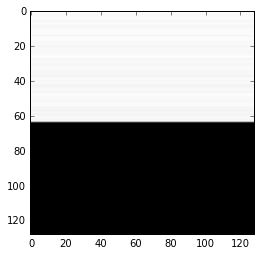

In [8]:
plt.imshow(rec_t_dct)